# Feature Selection

Many models do not perform well on high-dimensional data. **The curse of dimensionality**

In [101]:
import matplotlib.pyplot as plt
import pandas as pd

business_df = pd.read_csv("Data/final_dataset.csv")

# Categorizing restaurants based on stars ratings
business_df["Category"] = pd.cut(business_df["Stars_Rating"],bins=[0.9,2,3,4,5],labels=["Poor","Average","Good","Successful"])

# Since price can't be 0 and None, so replace it with a 1
def changeStatus(status):
    if status == "Poor":
        return 0
    elif status == "Average":
        return 1
    elif status ==  "Good":
        return 2
    else:
        return 3

business_df['Category_Encoded'] = business_df["Category"].apply(changeStatus)
business_df["Category_Encoded"] = pd.to_numeric(business_df["Category_Encoded"])

business_df["Percentage_EH<$10,000"] = pd.to_numeric(business_df["Percentage_EH<$10,000"], 
                                                             errors='coerce')
business_df["Percentage_EH_$10,000-$14,999"] = pd.to_numeric(business_df["Percentage_EH_$10,000-$14,999"], 
                                                             errors='coerce')
business_df["Percentage_EH_$15,000-$24,999"] = pd.to_numeric(business_df["Percentage_EH_$15,000-$24,999"], 
                                                             errors='coerce')
business_df["Percentage_EH_$25,000-$34,999"] = pd.to_numeric(business_df["Percentage_EH_$25,000-$34,999"], 
                                                             errors='coerce')
business_df["Percentage_EH_$35,000-$49,999"] = pd.to_numeric(business_df["Percentage_EH_$35,000-$49,999"], 
                                                             errors='coerce')
business_df["Percentage_EH_$50,000-$74,999"] = pd.to_numeric(business_df["Percentage_EH_$50,000-$74,999"], 
                                                             errors='coerce')
business_df["Percentage_EH_$75,000-$99,999"] = pd.to_numeric(business_df["Percentage_EH_$75,000-$99,999"], 
                                                             errors='coerce')
business_df["Percentage_EH_$100,000-$149,999"] = pd.to_numeric(business_df["Percentage_EH_$100,000-$149,999"], 
                                                             errors='coerce')
business_df["Percentage_EH_$150,000-$199,999"] = pd.to_numeric(business_df["Percentage_EH_$150,000-$199,999"], 
                                                             errors='coerce')
business_df["Percentage_EH_$200,000<"] = pd.to_numeric(business_df["Percentage_EH_$200,000<"], 
                                                             errors='coerce')


business_df["Median_Income(dollars)"] = pd.to_numeric(business_df["Median_Income(dollars)"], errors='coerce')
business_df["Mean_Income(dollars)"] = pd.to_numeric(business_df["Mean_Income(dollars)"], errors='coerce')

business_df = business_df.dropna()

In [93]:
X = business_df.drop(columns=['Unnamed: 0', 'Review_Count', 'Restaurant_ID', 'Restaurants_Name', 'Address', 'City',
       'State', 'Postal_Code', 'Latitude', 'Longitude', 'Stars_Rating', 'Category', 'Category_Encoded'])
X

,Restaurants_Delivery,Outdoor_Seating,Accepts_CreditCards,Price_Range,Alcohol,Good_For_Kids,Reservations,Restaurants_TakeOut,WiFi,Good_For_Groups,...,"Percentage_EH_$25,000-$34,999","Percentage_EH_$35,000-$49,999","Percentage_EH_$50,000-$74,999","Percentage_EH_$75,000-$99,999","Percentage_EH_$100,000-$149,999","Percentage_EH_$150,000-$199,999","Percentage_EH_$200,000<",Median_Income(dollars),Mean_Income(dollars),Population
0,0,0,0,1,1,0,0,1,1,0,...,8.0,11.0,16.0,10.0,13.0,7.0,11.0,60676.0,91522.0,27034
1,1,0,1,1,1,1,0,1,0,0,...,14.0,20.0,23.0,13.0,8.0,2.0,1.0,47114.0,55452.0,34174
2,1,1,1,2,1,0,1,1,1,1,...,4.0,5.0,16.0,11.0,17.0,15.0,25.0,116368.0,162885.0,24172
3,1,1,1,1,1,1,0,1,0,0,...,7.0,9.0,14.0,12.0,16.0,10.0,18.0,86147.0,128426.0,57253
4,1,1,1,2,1,1,1,1,1,1,...,12.0,17.0,19.0,12.0,11.0,3.0,3.0,48782.0,65655.0,94481
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24814,1,0,1,2,1,1,0,1,1,0,...,8.0,9.0,20.0,14.0,20.0,11.0,8.0,76854.0,95665.0,76129
24815,0,0,1,3,1,1,1,0,1,1,...,3.0,5.0,13.0,29.0,9.0,5.0,18.0,92827.0,120146.0,1819
24816,1,1,1,2,1,0,0,1,1,1,...,10.0,8.0,18.0,11.0,12.0,9.0,14.0,68165.0,114580.0,23263
24817,0,1,1,1,1,1,0,0,1,1,...,13.0,16.0,24.0,13.0,12.0,2.0,3.0,55688.0,67108.0,47974


# Filter Features by Variation

In [94]:
sorted(zip(X.var(), X), reverse=True)

[(1379634871.8757398, 'Mean_Income(dollars)'),
 (1208313584.7835577, 'Population'),
 (703460071.3269411, 'Median_Income(dollars)'),
 (31948968.82152294, 'Total_Estimate_Households_per_Zip'),
 (9190394.962148657, 'Total_Estimate_Married-couple_Family_households'),
 (7825591.4555179775, 'Total_Estimate_Nonfamily_households'),
 (68.96429404537388, 'Percentage_EH_$200,000<'),
 (27.210582576693298, 'Percentage_EH_$100,000-$149,999'),
 (22.344936408728056, 'Percentage_EH<$10,000'),
 (16.336444763361794, 'Percentage_EH_$150,000-$199,999'),
 (15.212294727199701, 'Percentage_EH_$15,000-$24,999'),
 (14.532579133613012, 'Percentage_EH_$50,000-$74,999'),
 (14.225198611076324, 'Percentage_EH_$35,000-$49,999'),
 (12.960994049289189, 'Percentage_EH_$25,000-$34,999'),
 (9.894532414301473, 'Percentage_EH_$75,000-$99,999'),
 (5.567652397016298, 'Percentage_EH_$10,000-$14,999'),
 (1.7792601235746819, 'Noise_Level'),
 (0.3200633428961909, 'Price_Range'),
 (0.24816694383974439, 'Outdoor_Seating'),
 (0.2324

In [95]:
X.var()

Restaurants_Delivery                               2.297283e-01
Outdoor_Seating                                    2.481669e-01
Accepts_CreditCards                                5.122168e-02
Price_Range                                        3.200633e-01
Alcohol                                            8.161539e-02
Good_For_Kids                                      1.868055e-01
Reservations                                       2.324747e-01
Restaurants_TakeOut                                5.150901e-02
WiFi                                               2.314901e-01
Good_For_Groups                                    1.569886e-01
Wheelchair_Accessible                              2.232294e-01
Happy_Hour                                         1.885558e-01
Noise_Level                                        1.779260e+00
Dietary_Restrictions                               8.052173e-04
Total_Estimate_Households_per_Zip                  3.194897e+07
Total_Estimate_Married-couple_Family_hou

Restaurant Takeout and Dietary Restrictions

# Filter by Correlation
Checking for multicollinearity

In [102]:
business_df.columns

Index(['Unnamed: 0', 'Restaurant_ID', 'Restaurants_Name', 'Address', 'City',
       'State', 'Postal_Code', 'Latitude', 'Longitude', 'Stars_Rating',
       'Review_Count', 'Restaurants_Delivery', 'Outdoor_Seating',
       'Accepts_CreditCards', 'Price_Range', 'Alcohol', 'Good_For_Kids',
       'Reservations', 'Restaurants_TakeOut', 'WiFi', 'Good_For_Groups',
       'Wheelchair_Accessible', 'Happy_Hour', 'Noise_Level',
       'Dietary_Restrictions', 'Total_Estimate_Households_per_Zip',
       'Total_Estimate_Married-couple_Family_households',
       'Total_Estimate_Nonfamily_households', 'Percentage_EH<$10,000',
       'Percentage_EH_$10,000-$14,999', 'Percentage_EH_$15,000-$24,999',
       'Percentage_EH_$25,000-$34,999', 'Percentage_EH_$35,000-$49,999',
       'Percentage_EH_$50,000-$74,999', 'Percentage_EH_$75,000-$99,999',
       'Percentage_EH_$100,000-$149,999', 'Percentage_EH_$150,000-$199,999',
       'Percentage_EH_$200,000<', 'Median_Income(dollars)',
       'Mean_Income(dolla

In [103]:
X_y = business_df.drop(columns=['Unnamed: 0', 'Restaurant_ID', 'Restaurants_Name', 'Address', 'City',
       'State', 'Postal_Code', 'Latitude', 'Longitude', 'Category', 'Percentage_EH<$10,000',
       'Percentage_EH_$10,000-$14,999', 'Percentage_EH_$15,000-$24,999',
       'Percentage_EH_$25,000-$34,999', 'Percentage_EH_$35,000-$49,999',
       'Percentage_EH_$50,000-$74,999', 'Percentage_EH_$75,000-$99,999',
       'Percentage_EH_$100,000-$149,999', 'Percentage_EH_$150,000-$199,999',
       'Percentage_EH_$200,000<'])
X_y.dtypes

Stars_Rating                                       float64
Review_Count                                         int64
Restaurants_Delivery                                 int64
Outdoor_Seating                                      int64
Accepts_CreditCards                                  int64
Price_Range                                          int64
Alcohol                                              int64
Good_For_Kids                                        int64
Reservations                                         int64
Restaurants_TakeOut                                  int64
WiFi                                                 int64
Good_For_Groups                                      int64
Wheelchair_Accessible                                int64
Happy_Hour                                           int64
Noise_Level                                          int64
Dietary_Restrictions                                 int64
Total_Estimate_Households_per_Zip                    int

In [104]:
import seaborn as sb

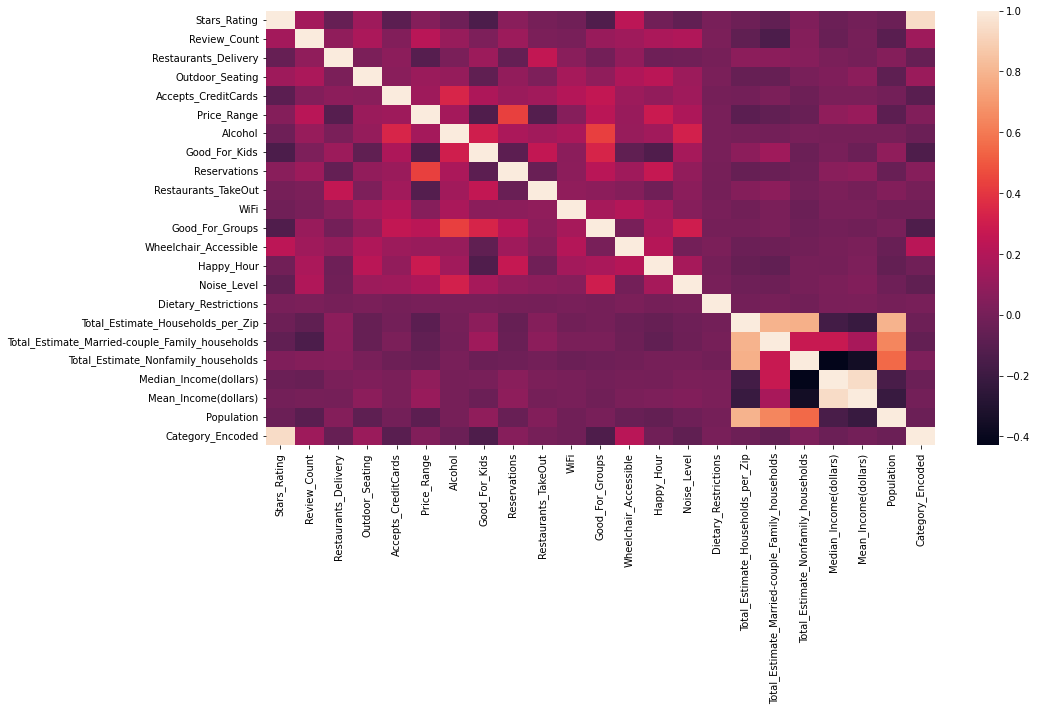

In [105]:
fig_dims = (15, 8)
fig, ax = plt.subplots(figsize=fig_dims)
sb.heatmap(X_y.corr(), ax=ax)
plt.show()

In [106]:
sorted(zip(abs(X_y.corr()["Stars_Rating"]), X_y), reverse=True)

[(1.0, 'Stars_Rating'),
 (0.9411603228000746, 'Category_Encoded'),
 (0.23463709321867526, 'Wheelchair_Accessible'),
 (0.15066311466904297, 'Review_Count'),
 (0.140075103778563, 'Good_For_Kids'),
 (0.13076662394179994, 'Outdoor_Seating'),
 (0.12864764948728943, 'Good_For_Groups'),
 (0.09384793504090844, 'Accepts_CreditCards'),
 (0.06841585125098765, 'Total_Estimate_Married-couple_Family_households'),
 (0.0671910262636063, 'Reservations'),
 (0.06669094125506966, 'Noise_Level'),
 (0.051175041023452994, 'Restaurants_Delivery'),
 (0.04721377469709454, 'Price_Range'),
 (0.03676130712465237, 'Population'),
 (0.0354879849905372, 'Median_Income(dollars)'),
 (0.032197501067591706, 'Total_Estimate_Households_per_Zip'),
 (0.028767252215406016, 'Total_Estimate_Nonfamily_households'),
 (0.02561935871983016, 'Alcohol'),
 (0.017975712670082633, 'WiFi'),
 (0.013924311143855955, 'Happy_Hour'),
 (0.009640888581149495, 'Dietary_Restrictions'),
 (0.005960710547637482, 'Mean_Income(dollars)'),
 (0.004691957

In [107]:
sorted(zip(abs(X_y.corr()["Category_Encoded"]), X_y), reverse=True)

[(1.0, 'Category_Encoded'),
 (0.9411603228000746, 'Stars_Rating'),
 (0.22092599217891382, 'Wheelchair_Accessible'),
 (0.13596069607163508, 'Good_For_Kids'),
 (0.13353236755538872, 'Good_For_Groups'),
 (0.129888427492916, 'Review_Count'),
 (0.12136058241466295, 'Outdoor_Seating'),
 (0.09520319575930346, 'Accepts_CreditCards'),
 (0.076168950002541, 'Noise_Level'),
 (0.06362178806276479, 'Total_Estimate_Married-couple_Family_households'),
 (0.05206328452258327, 'Reservations'),
 (0.05185763856802733, 'Restaurants_Delivery'),
 (0.03609339694218189, 'Alcohol'),
 (0.03548072154731165, 'Price_Range'),
 (0.035244189650551226, 'Median_Income(dollars)'),
 (0.03317641726388456, 'Population'),
 (0.028941038355616074, 'Total_Estimate_Households_per_Zip'),
 (0.027702143726702974, 'Total_Estimate_Nonfamily_households'),
 (0.02153908293693111, 'Happy_Hour'),
 (0.01929892828903514, 'WiFi'),
 (0.008842906578001977, 'Dietary_Restrictions'),
 (0.007175338175951236, 'Mean_Income(dollars)'),
 (0.00101671502

# Sequential Feature Selection

In [89]:
import matplotlib.pyplot as plt
import numpy as np

In [90]:
# Define features set
X = business_df.drop(columns=['Unnamed: 0', 'Restaurant_ID', 'Restaurants_Name', 'Address', 'City',
       'State', 'Postal_Code', 'Latitude', 'Longitude', 'Stars_Rating', 'Category', 'Category_Encoded'])

In [75]:
y = business_df["Category"]

In [76]:
# Split the model into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,
                                                   y, 
                                                   random_state=1, 
                                                    stratify=y)

In [81]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=5)

model.fit(X_train, y_train)

print('Training accuracy:', np.mean(model.predict(X_train) == y_train)*100)

Training accuracy: 64.16564567507965


In [82]:
# Select the best 5 features

In [83]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

sfs1 = SFS(model, 
          k_features=5,
          forward=True,
          floating=False, 
          verbose=2, 
          scoring='accuracy',
          cv=5)

sfs1 = sfs1.fit(X_train, y_train)

ModuleNotFoundError: No module named 'mlxtend'

In [ ]:
from numpy import set_printoptions
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
# load data
filename = 'pima-indians-diabetes.data.csv'
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = read_csv(filename, names=names)
array = dataframe.values
X = array[:,0:8]
Y = array[:,8]
# feature extraction
test = SelectKBest(score_func=f_classif, k=4)
fit = test.fit(X, Y)
# summarize scores
set_printoptions(precision=3)
print(fit.scores_)
features = fit.transform(X)
# summarize selected features
print(features[0:5,:])